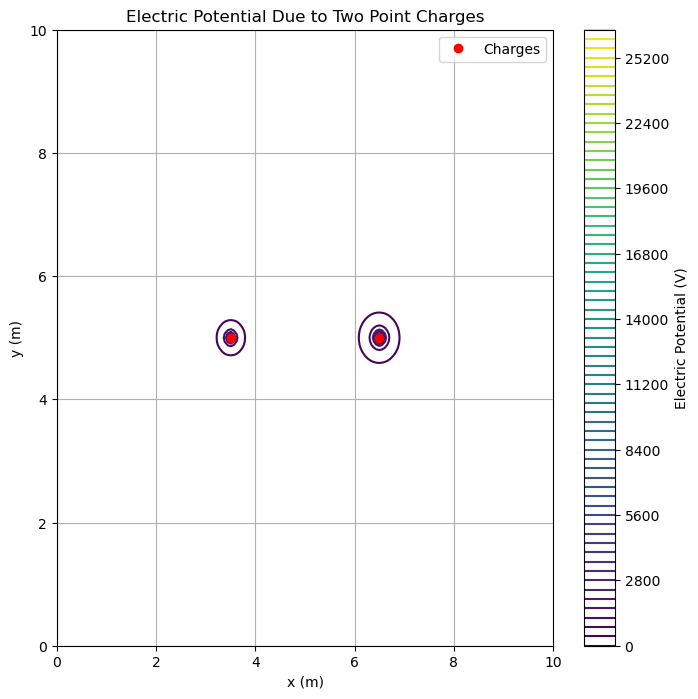

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_electric_potential(L, s, k, q1, q2, x1, x2, y1, y2, N_p):
    """
    Compute and visualize the electric potential due to two point charges.

    Parameters:
        L (float): Length of the square domain (m).
        s (float): Separation between the two charges along the x-axis (m).
        k (float): Coulomb's constant (simplified for demonstration).
        q1 (float): Magnitude of the first charge (C).
        q2 (float): Magnitude of the second charge (C).
        x1, x2 (float): x-coordinates of the two charges (m).
        y1, y2 (float): y-coordinates of the two charges (m).
        N_p (int): Number of grid points along each axis.

    Returns:
        None: Displays and saves the contour plot of the electric potential.
    """
    # Create grid for x and y coordinates
    x = np.linspace(0, L, N_p)
    y = np.linspace(0, L, N_p)
    X, Y = np.meshgrid(x, y)

    # Initialize potential array
    V = np.zeros((N_p, N_p), dtype=float)

    # Compute distances from each charge to all grid points (vectorized)
    r1 = np.sqrt((X - x1)**2 + (Y - y1)**2)
    r2 = np.sqrt((X - x2)**2 + (Y - y2)**2)

    # Avoid division by zero by setting a small minimum distance
    r1 = np.maximum(r1, 1e-10)
    r2 = np.maximum(r2, 1e-10)

    # Compute electric potential contributions from both charges
    V1 = (k * q1) / r1
    V2 = (k * q2) / r2
    V = V1 + V2

    # Create contour plot
    plt.figure(figsize=(8, 8))
    contour = plt.contour(X, Y, V, levels=70, cmap='viridis')
    plt.colorbar(contour, label='Electric Potential (V)')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Electric Potential Due to Two Point Charges')
    plt.grid(True)

    # Mark the positions of the charges
    plt.plot([x1, x2], [y1, y2], 'ro', label='Charges')
    plt.legend()

    # Save the plot as a PNG file
    plt.savefig('electric_potential_plot.png', dpi=300, bbox_inches='tight')
    # Display the plot
    plt.show()

# Define constants
L = 10.0  # Length of the square domain (m)
s = 3.0   # Separation between charges (m)
k = 5.0   # Coulomb's constant (simplified for demonstration)
q1 = 20.0  # Charge 1 magnitude (C)
q2 = 30.0  # Charge 2 magnitude (C)
x1 = L/2 - s/2  # x-coordinate of charge 1
x2 = L/2 + s/2  # x-coordinate of charge 2
y1 = L/2        # y-coordinate of charge 1
y2 = L/2        # y-coordinate of charge 2
N_p = 175       # Number of grid points per axis

# Compute and plot the electric potential
compute_electric_potential(L, s, k, q1, q2, x1, x2, y1, y2, N_p)